# How good is predicting based on mean of x_vals??

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [19]:
DIRECTORY = './data/'
train = pd.read_csv(DIRECTORY + 'train.csv').drop(columns='id')
train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [20]:
dataset = train
# dataset = train[(train.drop(columns='FloodProbability') >= 14).sum(axis=1).astype(bool)]
# dataset = train.replace([7,8], 7.5)
X_train = dataset.drop(columns='FloodProbability').mean(axis=1)
y_train = dataset['FloodProbability']

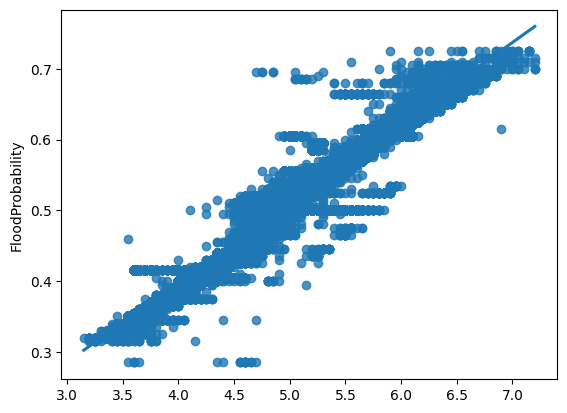

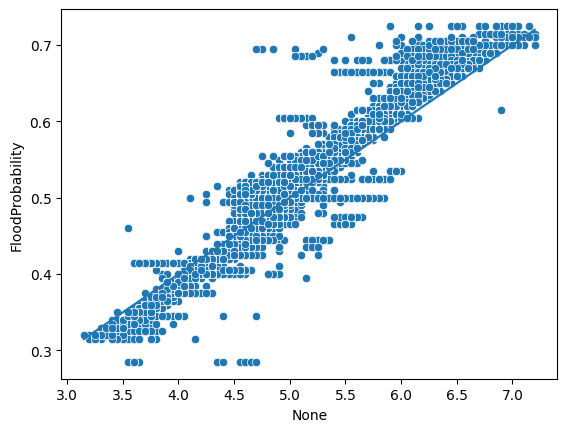

In [21]:
sns.regplot(x=X_train, y=y_train, ci=None)
plt.show()

sns.scatterplot(x=X_train, y=y_train)
coef = 0.10
sns.lineplot(x=X_train, y=X_train * coef)
plt.show()

In [22]:
# What is up with these points???
r2_score(y_train, X_train * 0.1022)

0.8372797298104586